# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [59]:
%pip install fastf1
%pip install seaborn
%matplotlib inline


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt

import fastf1.plotting

import pandas as pd

from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

import seaborn as sns

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
grand_prix_session = 'R'
grand_prix_year = 2024
session = fastf1.get_session(grand_prix_year, 2, grand_prix_session)
grand_prix_name = session.event['EventName']
grand_prix_name_official = session.event['OfficialEventName']
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


First, we select the two laps that we want to compare



In [26]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()
#sai_lap = session.laps.pick_driver('SAI').pick_fastest()
bea_lap = session.laps.pick_driver('BEA').pick_fastest()
alo_lap = session.laps.pick_driver('ALO').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
rus_lap = session.laps.pick_driver('RUS').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [27]:
ver_tel = ver_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
#sai_tel = sai_lap.get_car_data().add_distance()
bea_tel = bea_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
rus_tel = rus_lap.get_car_data().add_distance()

In [28]:
def format_lap_time(timedelta):
    """
    Formatea un objeto Timedelta a una cadena en el formato MM:SS.sss.
    
    :param timedelta: Timedelta, el tiempo de vuelta a formatear.
    :return: str, el tiempo formateado como MM:SS.sss.
    """
    total_seconds = timedelta.total_seconds()
    minutes = int(total_seconds // 60)
    seconds = total_seconds % 60
    formatted_time = f"{minutes:02d}:{seconds:06.3f}"
    return formatted_time

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



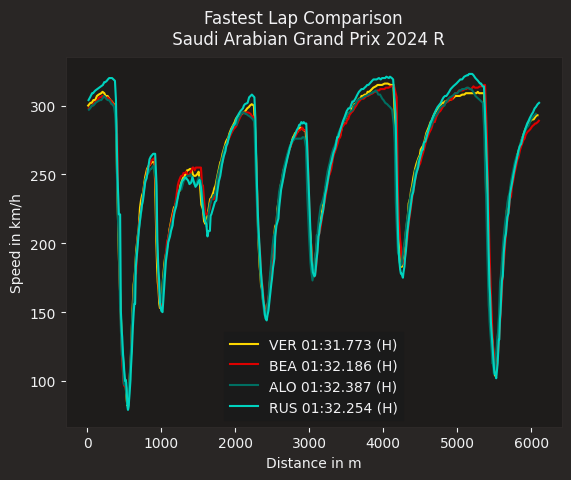

In [30]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')
ast_color = fastf1.plotting.team_color('AST')
fer_color = fastf1.plotting.team_color('FER')
mcl_color = fastf1.plotting.team_color('MCL')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label=f"VER {format_lap_time(ver_lap['LapTime'])} ({ver_lap['Compound'][0]})")
#ax.plot(per_tel['Distance'], per_tel['Speed'], color=rbr_color, label='PER')
#ax.plot(sai_tel['Distance'], sai_tel['Speed'], color=fer_color, label=f"SAI {format_lap_time(sai_lap['LapTime'])} ({sai_lap['Compound'][0]})")
ax.plot(bea_tel['Distance'], bea_tel['Speed'], color=fer_color, label=f"BEA {format_lap_time(bea_lap['LapTime'])} ({bea_lap['Compound'][0]})")
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=ast_color, label=f"ALO {format_lap_time(alo_lap['LapTime'])} ({alo_lap['Compound'][0]})")
#ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mer_color, label=f"RUS {format_lap_time(rus_lap['LapTime'])} ({rus_lap['Compound'][0]})")

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{grand_prix_name} {session.event.year} {grand_prix_session}")

plt.show()

In [65]:
#####

In [66]:

rus_laps = session.laps.pick_driver('RUS')
ham_laps = session.laps.pick_driver('HAM')
lap_times = pd.DataFrame({
    'Lap Number': rus_laps['LapNumber'],
    'Lap Time': rus_laps['LapTime']
})

# Mostrar la tabla
print(lap_times)

     Lap Number               Lap Time
400         1.0                    NaT
401         2.0 0 days 00:01:33.657000
402         3.0 0 days 00:01:49.358000
403         4.0 0 days 00:01:32.154000
404         5.0 0 days 00:02:25.344000
405         6.0 0 days 00:02:00.092000
406         7.0 0 days 00:01:30.806000
407         8.0 0 days 00:02:05.637000
408         9.0 0 days 00:01:30.554000
409        10.0 0 days 00:02:00.145000
410        11.0                    NaT
411        12.0 0 days 00:01:30.011000
412        13.0                    NaT
413        14.0                    NaT
414        15.0 0 days 00:01:29.939000
415        16.0 0 days 00:01:42.004000
416        17.0                    NaT
417        18.0 0 days 00:01:34.717000
418        19.0 0 days 00:01:34.776000
419        20.0 0 days 00:01:34.849000
420        21.0 0 days 00:01:34.512000
421        22.0                    NaT
422        23.0 0 days 00:02:22.728000


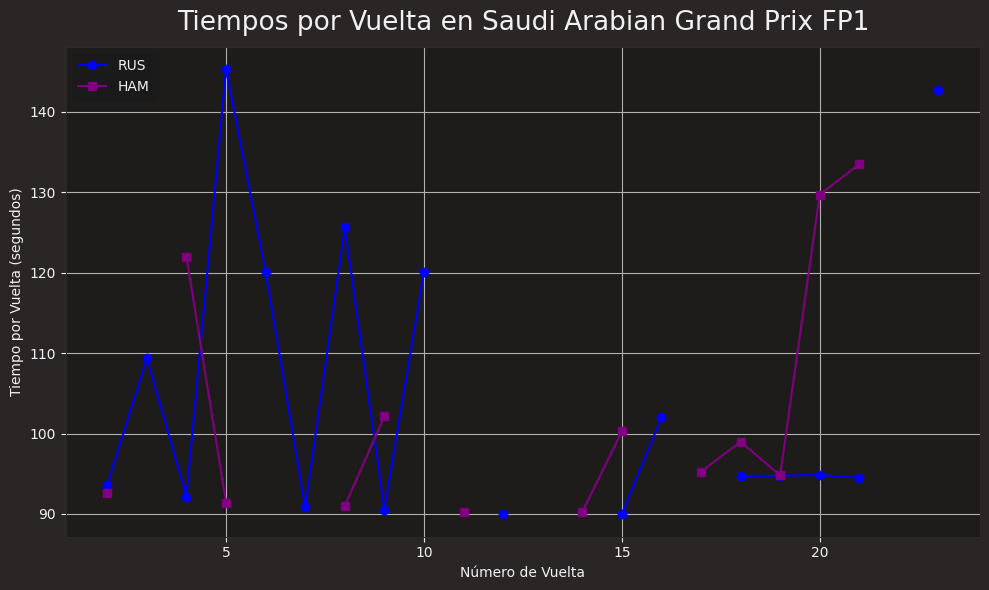

In [67]:
# Convertir los tiempos por vuelta a segundos para la visualización
rus_laps_time = rus_laps['LapTime'].dt.total_seconds()
ham_laps_time = ham_laps['LapTime'].dt.total_seconds()

# Crear un gráfico de los tiempos por vuelta
plt.figure(figsize=(10, 6))
plt.plot(rus_laps['LapNumber'], rus_laps_time, marker='o', color='blue', label='RUS')
plt.plot(ham_laps['LapNumber'], ham_laps_time, marker='s', color='purple', label='HAM')

# Establecer los títulos y etiquetas
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.xlabel('Número de Vuelta')
plt.ylabel('Tiempo por Vuelta (segundos)')

# Mejorar el formato del gráfico
plt.grid(True)
plt.tight_layout()
plt.legend()
# Mostrar el gráfico
plt.show()

In [68]:
### animacion


NameError: name 'rus_lap_times' is not defined

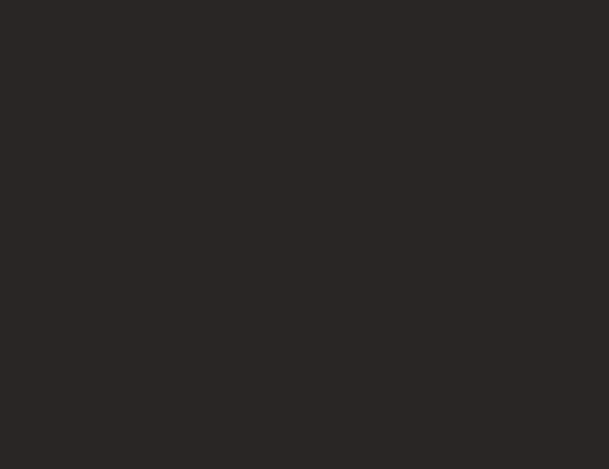

In [69]:
# Asumiendo que 'session' y 'laps' ya están definidos y que tienes 'rus_laps' y 'ham_laps'
# Convertir los tiempos por vuelta a segundos
rus_lap_times_seconds = rus_laps['LapTime'].dt.total_seconds()
ham_lap_times_seconds = ham_laps['LapTime'].dt.total_seconds()

# Preparar el DataFrame para Hamilton similar a Russell
ham_lap_times = pd.DataFrame({
    'Lap Number': ham_laps['LapNumber'],
    'Lap Time': ham_lap_times_seconds
})

# Máximo número de vueltas (para el rango de frames)
max_laps = max(rus_laps['LapNumber'].max(), ham_laps['LapNumber'].max())


# Inicialización de la figura de Matplotlib
fig, ax = plt.subplots()

# Función para configurar el gráfico inicialmente
def init():
    ax.set_xlim(0, max_laps + 1)
    ax.set_ylim(0, max(rus_lap_times_seconds.max(), ham_lap_times_seconds.max()) + 10)
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Lap Time (seconds)')
    ax.set_title('Lap Time Comparison: Russell vs. Hamilton')
    return ax,

# Función de actualización para la animación
def update(frame):
    ax.clear()
    init()
    # Asegúrate de actualizar esta parte con tus datos
    ax.plot(rus_lap_times['Lap Number'][:frame], rus_lap_times['Lap Time'][:frame], label='Russell', color='blue')
    ax.plot(ham_lap_times['Lap Number'][:frame], ham_lap_times['Lap Time'][:frame], label='Hamilton', color='red')
    ax.legend()
    return ax,

# Crear la animación
ani = FuncAnimation(fig, update, frames=np.arange(1, max_laps + 2), init_func=init, blit=True, repeat=False)

# Mostrar la animación
HTML(ani.to_jshtml())

## Team comparison

In [70]:
laps = session.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Aston Martin', 'Alpine', 'RB', 'Mercedes', 'Red Bull Racing',
       'Ferrari', 'McLaren', 'Kick Sauber', 'Haas F1 Team', 'Williams'],
      dtype='object', name='Team')


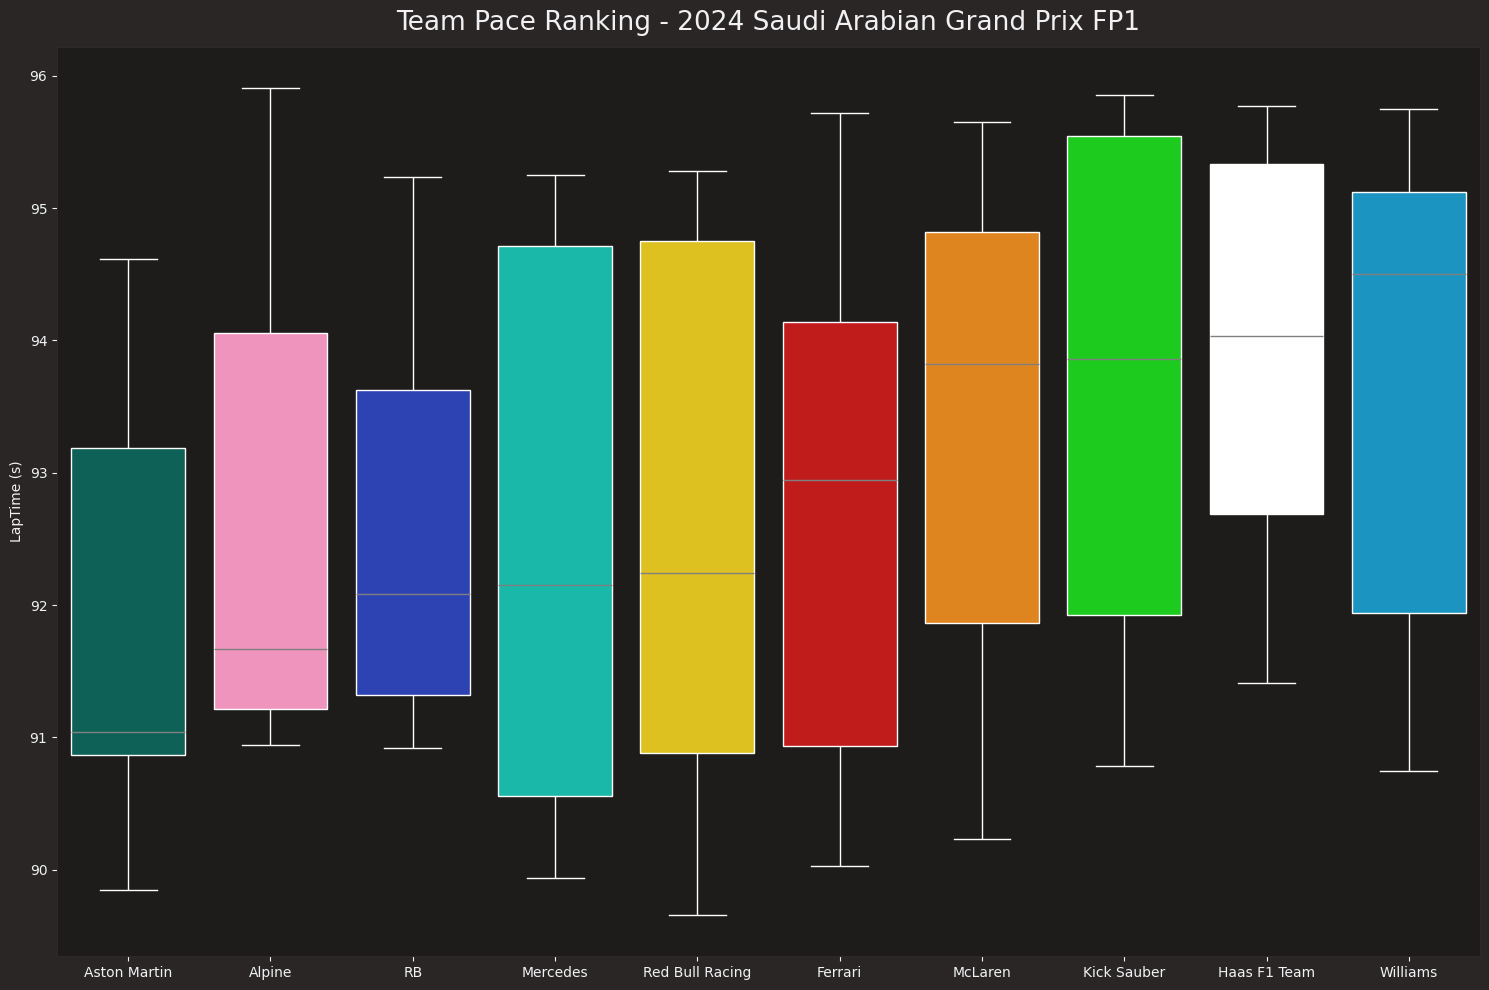

In [82]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Team Pace Ranking - {grand_prix_year} {grand_prix_name} {grand_prix_session}")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


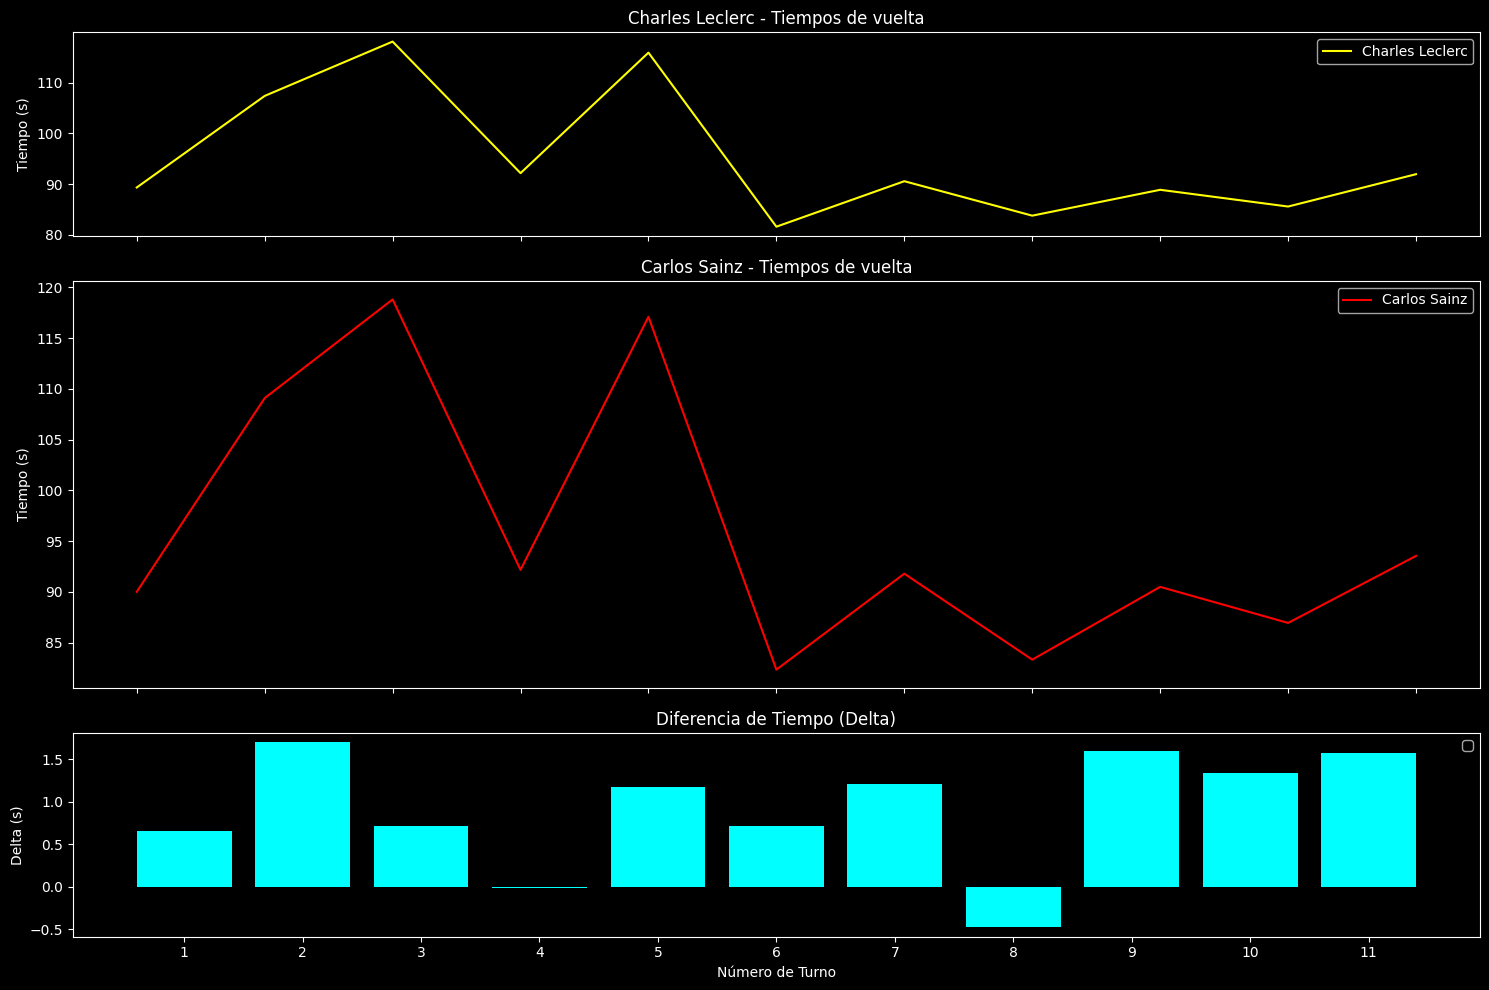

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial para que los gráficos se vean más similares a la imagen
plt.style.use('dark_background')

# Simulando los datos
n_turnos = 11
turnos = np.arange(1, n_turnos + 1)
tiempos_leclerc = np.random.uniform(low=80, high=120, size=n_turnos)
tiempos_sainz = tiempos_leclerc + np.random.uniform(low=-2, high=2, size=n_turnos)  # Simulando que son muy cercanos
delta_tiempo = tiempos_sainz - tiempos_leclerc

# Crear la figura y los ejes
fig, ax = plt.subplots(3, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 2, 1]})

# Gráfico de tiempos de vuelta para Leclerc
ax[0].plot(turnos, tiempos_leclerc, label='Charles Leclerc', color='yellow')
ax[0].set_title('Charles Leclerc - Tiempos de vuelta')
ax[0].set_ylabel('Tiempo (s)')
ax[0].set_xticks(range(1, n_turnos + 1))
ax[0].set_xticklabels([])  # Elimina las etiquetas del eje x para este gráfico

# Gráfico de tiempos de vuelta para Sainz
ax[1].plot(turnos, tiempos_sainz, label='Carlos Sainz', color='red')
ax[1].set_title('Carlos Sainz - Tiempos de vuelta')
ax[1].set_ylabel('Tiempo (s)')
ax[1].set_xticks(range(1, n_turnos + 1))
ax[1].set_xticklabels([])  # Elimina las etiquetas del eje x para este gráfico también

# Gráfico de deltas de tiempo
ax[2].bar(turnos, delta_tiempo, color='cyan')
ax[2].set_title('Diferencia de Tiempo (Delta)')
ax[2].set_ylabel('Delta (s)')
ax[2].set_xlabel('Número de Turno')
ax[2].set_xticks(range(1, n_turnos + 1))

# Mostrar la leyenda
for axes in ax:
    axes.legend()

# Ajuste de layout
plt.tight_layout()
plt.show()

Ficha de comparación de compañeros de equipo

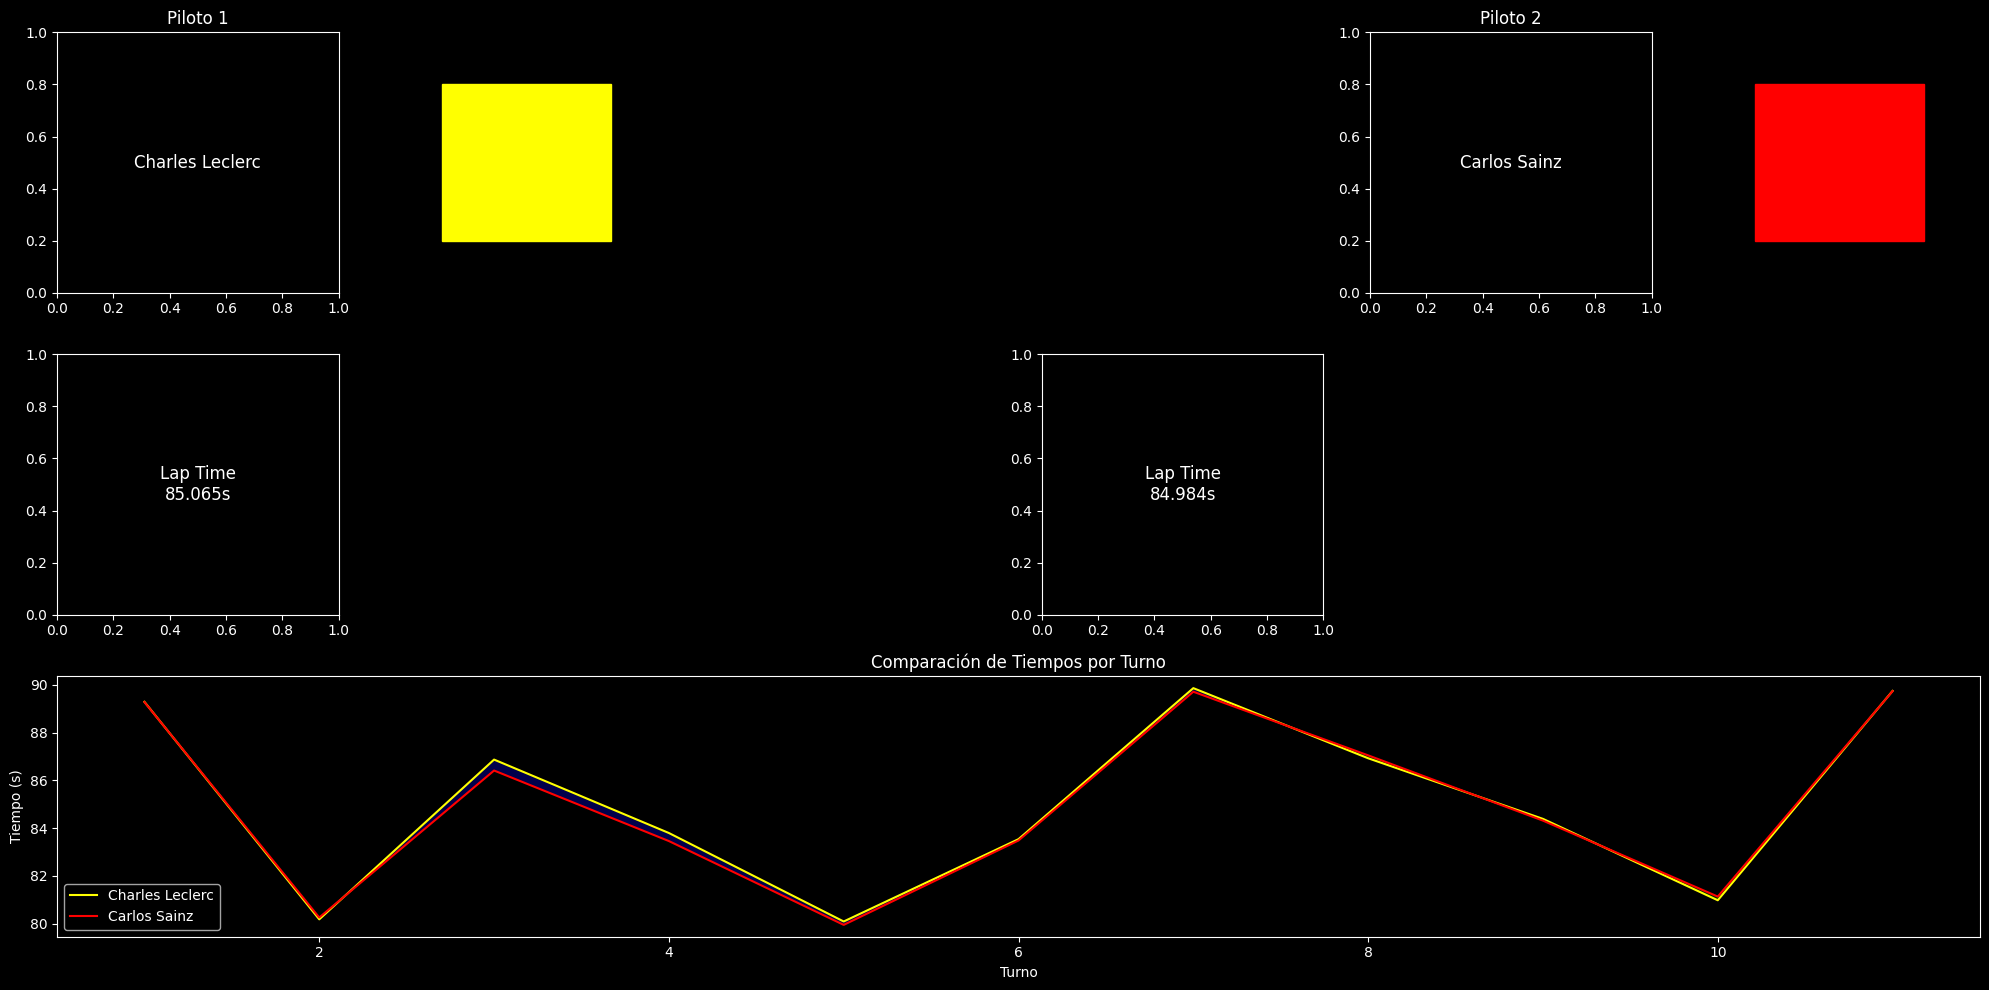

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Configuración inicial para que los gráficos se vean más similares a la imagen
plt.style.use('dark_background')

# Datos simulados para los tiempos de vuelta
turnos = np.arange(1, 12)  # 11 turnos
tiempos_leclerc = np.random.uniform(80, 90, size=turnos.shape)
tiempos_sainz = tiempos_leclerc + np.random.normal(0, 0.2, size=turnos.shape)  # tiempos similares con variación normal
delta_tiempo = tiempos_sainz - tiempos_leclerc

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 6, figsize=(20, 10))

# Ocultar todos los ejes de la matriz
for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

# Coloca los nombres de los pilotos y los escudos en la fila 1
axs[0, 0].axis('on')
axs[0, 0].text(0.5, 0.5, 'Charles Leclerc', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
axs[0, 0].set_title('Piloto 1')
axs[0, 4].axis('on')
axs[0, 4].text(0.5, 0.5, 'Carlos Sainz', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
axs[0, 4].set_title('Piloto 2')

# Para simular el escudo del equipo, usaré un rectángulo, pero aquí podrías cargar una imagen
axs[0, 1].add_patch(plt.Rectangle((0.2, 0.2), 0.6, 0.6, color='yellow'))  # Simula el escudo de Ferrari para Leclerc
axs[0, 5].add_patch(plt.Rectangle((0.2, 0.2), 0.6, 0.6, color='red'))  # Simula el escudo de Ferrari para Sainz

# Agrega los datos de tiempo en la fila 2
axs[1, 0].axis('on')
axs[1, 0].text(0.5, 0.5, f'Lap Time\n{np.mean(tiempos_leclerc):.3f}s', ha='center', va='center', fontsize=12, color='white')
axs[1, 3].axis('on')
axs[1, 3].text(0.5, 0.5, f'Lap Time\n{np.mean(tiempos_sainz):.3f}s', ha='center', va='center', fontsize=12, color='white')

# Combinamos las columnas para la fila 3 y colocamos la gráfica de comparación de tiempos
gridsize = (3, 6)
ax_time_comparison = plt.subplot2grid(gridsize, (2, 0), colspan=6, rowspan=1)
ax_time_comparison.plot(turnos, tiempos_leclerc, label='Charles Leclerc', color='yellow')
ax_time_comparison.plot(turnos, tiempos_sainz, label='Carlos Sainz', color='red')
ax_time_comparison.fill_between(turnos, tiempos_leclerc, tiempos_sainz, where=(tiempos_sainz >= tiempos_leclerc), facecolor='green', alpha=0.3, interpolate=True)
ax_time_comparison.fill_between(turnos, tiempos_leclerc, tiempos_sainz, where=(tiempos_sainz <= tiempos_leclerc), facecolor='blue', alpha=0.3, interpolate=True)
ax_time_comparison.set_title('Comparación de Tiempos por Turno')
ax_time_comparison.set_xlabel('Turno')
ax_time_comparison.set_ylabel('Tiempo (s)')
ax_time_comparison.legend()

plt.tight_layout()
plt.show()

Complete view

In [17]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np

def add_team_logo(ax, team_name, zoom=0.2):
    """
    Carga y muestra el escudo del equipo en el eje proporcionado.
    
    Parámetros:
    ax -- el eje de Matplotlib donde se colocará la imagen.
    team_name -- el nombre del equipo, que corresponde al nombre del archivo de imagen.
    zoom -- el nivel de zoom para la imagen.
    """
    base_path = './images/teams/'  # Actualiza con la ruta correcta a tus imágenes
    file_path = f'{base_path}{team_name}.png'  # Asume que el nombre de la imagen es el mismo que el nombre del equipo
    
    try:
        # Carga la imagen
        img = Image.open(file_path)
        
        # Convierte la imagen PIL a un objeto de imagen que Matplotlib pueda manejar
        img = np.array(img)
        
        # Crear el objeto OffsetImage
        imagebox = OffsetImage(img, zoom=zoom)
        
        # Crear el objeto AnnotationBbox y colocarlo en el eje
        ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, boxcoords="axes fraction")
        ax.add_artist(ab)
        
    except FileNotFoundError:
        print(f'El archivo {file_path} no existe.')



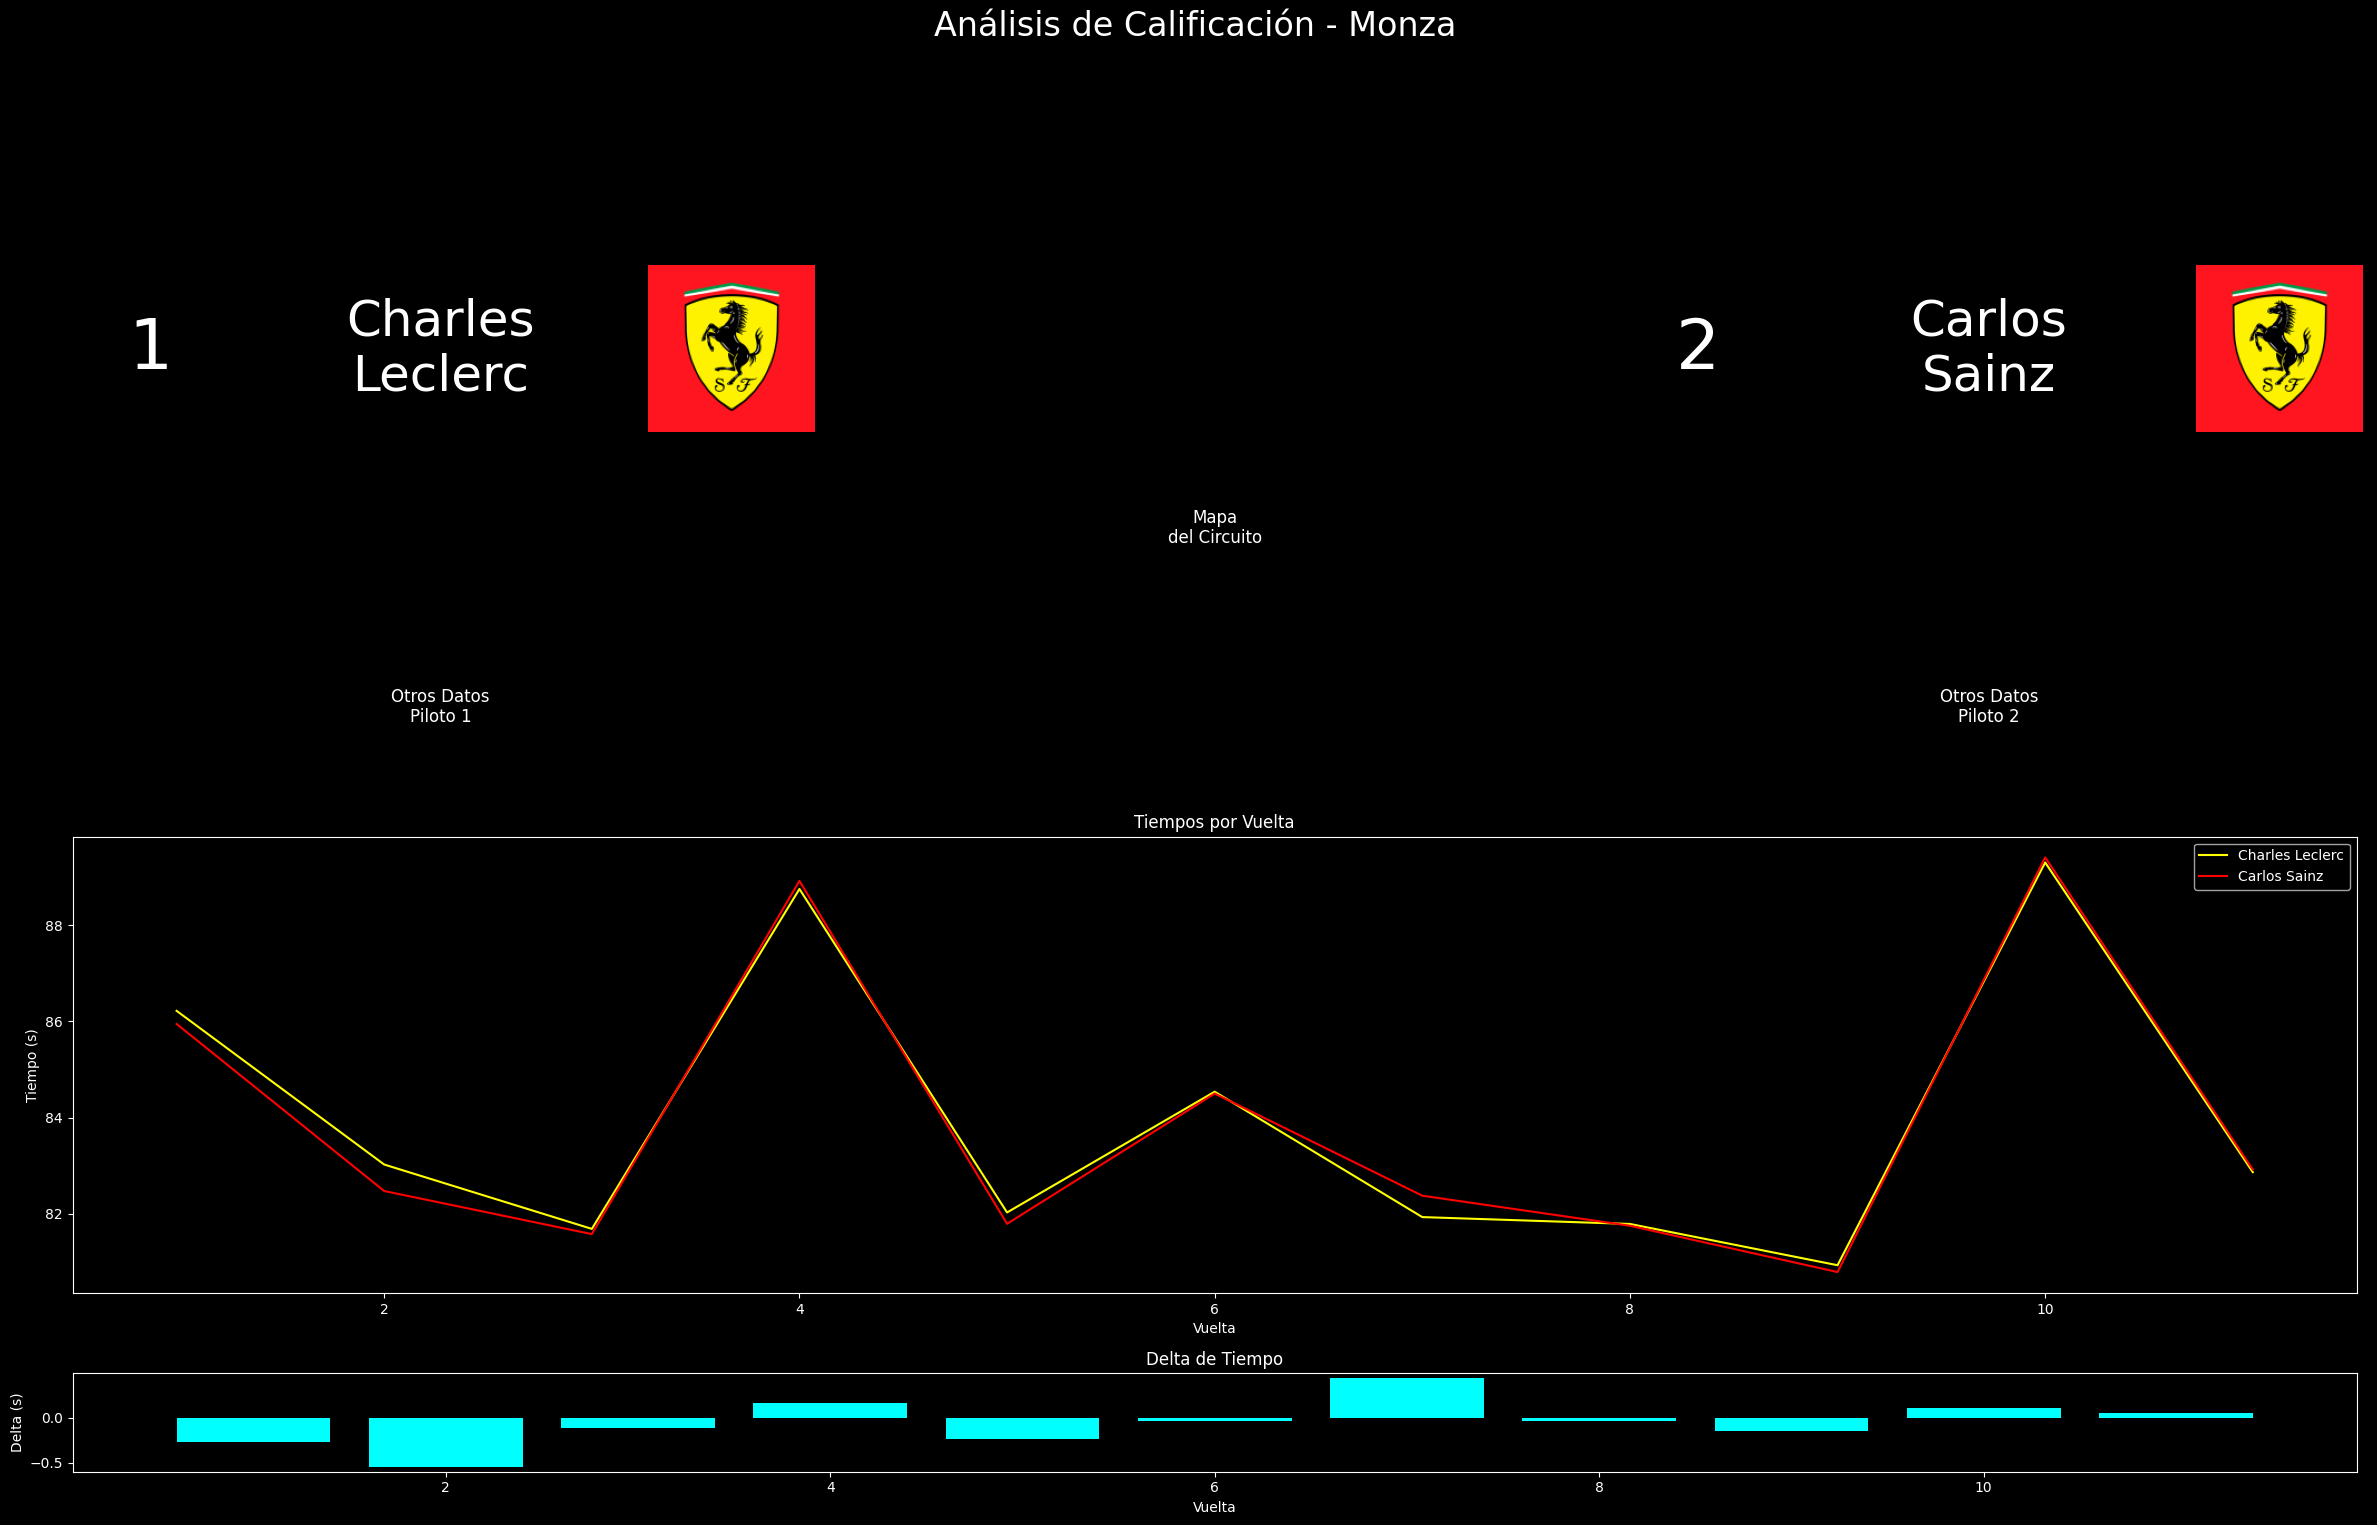

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

font_driver_number = 50
font_driver_name = 36

# Datos simulados
n_vueltas = 11
vueltas = np.arange(1, n_vueltas + 1)
tiempos_leclerc = np.random.uniform(80, 90, size=n_vueltas)
tiempos_sainz = tiempos_leclerc + np.random.normal(0, 0.2, size=n_vueltas)  # tiempos similares con variación normal
delta_tiempo = tiempos_sainz - tiempos_leclerc

# Iniciar la figura con GridSpec
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(8, 12, figure=fig)

# Título grande del header
fig.suptitle('Análisis de Calificación - Monza', fontsize=24, color='white')

# Información del piloto 1
ax1 = fig.add_subplot(gs[1, 0])
ax1.text(0.5, 0.5, '1', ha='center', va='center', fontsize=font_driver_number, color='white')
ax1.axis('off')

ax2 = fig.add_subplot(gs[1, 1:3])
ax2.text(0.5, 0.5, 'Charles\nLeclerc', ha='center', va='center', fontsize=font_driver_name, color='white')
ax2.axis('off')

ax3 = fig.add_subplot(gs[1, 3])
#ax3.text(0.5, 0.5, 'Escudo', ha='center', va='center', fontsize=12, color='yellow')
add_team_logo(ax3, 'ferrari', zoom=0.8)  # reemplaza 'nombre_equipo' con el nombre correspondiente
ax3.axis('off')

# Información del piloto 2
ax4 = fig.add_subplot(gs[1, 8])
ax4.text(0.5, 0.5, '2', ha='center', va='center', fontsize=font_driver_number, color='white')
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 9:11])
ax5.text(0.5, 0.5, 'Carlos\nSainz', ha='center', va='center', fontsize=font_driver_name, color='white')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 11])
#ax6.text(0.5, 0.5, 'Escudo', ha='center', va='center', fontsize=12, color='red')
add_team_logo(ax6, 'ferrari', zoom=0.8)  # reemplaza 'nombre_equipo' con el nombre correspondiente
ax6.axis('off')

# Otros datos para los pilotos (simulados por texto por ahora)
ax7 = fig.add_subplot(gs[3, 0:4])
ax7.text(0.5, 0.5, 'Otros Datos\nPiloto 1', ha='center', va='center', fontsize=12, color='white')
ax7.axis('off')

ax8 = fig.add_subplot(gs[3, 8:12])
ax8.text(0.5, 0.5, 'Otros Datos\nPiloto 2', ha='center', va='center', fontsize=12, color='white')
ax8.axis('off')

# Mapa del circuito en el centro
ax_map = fig.add_subplot(gs[1:4, 4:8])
ax_map.text(0.5, 0.5, 'Mapa\ndel Circuito', ha='center', va='center', fontsize=12, color='white')
ax_map.axis('off')

# Tiempos por vuelta de ambos pilotos
ax_time_comparison = fig.add_subplot(gs[4:7, :])
ax_time_comparison.plot(vueltas, tiempos_leclerc, label='Charles Leclerc', color='yellow')
ax_time_comparison.plot(vueltas, tiempos_sainz, label='Carlos Sainz', color='red')
ax_time_comparison.set_title('Tiempos por Vuelta')
ax_time_comparison.set_xlabel('Vuelta')
ax_time_comparison.set_ylabel('Tiempo (s)')
ax_time_comparison.legend()

# Delta de tiempo entre ellos en la fila 8
ax_delta_time = fig.add_subplot(gs[7, :])
ax_delta_time.bar(vueltas, delta_tiempo, color='cyan')
ax_delta_time.set_title('Delta de Tiempo')
ax_delta_time.set_xlabel('Vuelta')
ax_delta_time.set_ylabel('Delta (s)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el layout para el título
plt.show()
